# CSP 502 - Assignment 2 & 3  [FACE RECOGNITION USING SIFT ALGORITHM]

# Team Name: Bit Coders

## Name: Supan Shah - AU 2044011

## Name: Bhumiti Gohel - AU 1841051

# Mount your drive if you want to use our face database.

Ask supan.s2@ahduni.edu.in OR bhumiti.g@ahduni.edu.in for access to our face database.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Imports and helper functions

## Libraries

In [ ]:
!pip install opencv-contrib-python==3.4.2.16
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from pathlib import Path
import cv2
import numpy as np
import PIL
import io
import html
import time
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import os
from skimage import io
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import cv2

     |████████████████████████████████| 30.6MB 142kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


## SIFT algorithm

In [ ]:
# SIFT implementation

# MIN_MATCH_COUNT = 10

def sift_match(test, image, plot=False, MIN_MATCH_COUNT=10):
    isMatch = False
    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()
    # img1 = cv.imread(test,cv.IMREAD_GRAYSCALE)# queryImage
    img1 = test
    img2 = cv.imread(image,cv.IMREAD_GRAYSCALE) # trainImage
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
      
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        # print("MATCH FOUND")
        isMatch = True
    else:
        # print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        isMatch = False
    if plot:
        matchesMask = None
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                          singlePointColor = None,
                          matchesMask = matchesMask, # draw only inliers
                          flags = 2)

        img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

        plt.imshow(img3, 'gray'),plt.show()
    
    return (isMatch, len(good))

## SURF algorithm

In [ ]:
# SURF implementation

# MIN_MATCH_COUNT = 10

def surf_match(test, image, plot=False, MIN_MATCH_COUNT=10):
    isMatch = False
    # Initiate SIFT detector
    surf = cv2.xfeatures2d.SURF_create(400)
    # img1 = cv.imread(test,cv.IMREAD_GRAYSCALE)# queryImage
    img1 = test
    img2 = cv.imread(image,cv.IMREAD_GRAYSCALE) # trainImage
    # find the keypoints and descriptors with SIFT
    kp1, des1 = surf.detectAndCompute(img1,None)
    kp2, des2 = surf.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
      
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
        # print("MATCH FOUND")
        isMatch = True
    else:
        # print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        isMatch = False
    if plot:
        matchesMask = None
        draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                          singlePointColor = None,
                          matchesMask = matchesMask, # draw only inliers
                          flags = 2)

        img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

        plt.imshow(img3, 'gray'),plt.show()
    
    return (isMatch, len(good))

## Image helper functions

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Video helper functions

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# Choose your face data directory path

Our directory will be loaded at '/gdrive/MyDrive/BitCoders/Assignment2/'.
Feel free to load a blank directory and create your own database.

In [ ]:
main_dir = '/gdrive/MyDrive/BitCoders/Assignment2/'

## Load the database

In [ ]:
image_database = {}
pathlist = Path(str(main_dir)).rglob('*.jpg')
for path in pathlist:
  path_in_str = str(path)
  image_database[path_in_str] = path_in_str.split('/')[-2]

# Add yourself to the face database

In [ ]:
#@title Your Information:
#@markdown This info will help us to analyse your face and identify you in future.
# Name = 'Insert Name here (eg. Supan / Bhumiti)'
Name = 'supan'  #@param {type: "string"}
#@markdown More number of images = better face recognition !!
#@markdown So, please consider clicking atleast around 20 images.
Number_of_images = 25  #@param {type: "slider", min: 1, max: 40}
#@markdown ---

class NameError(Exception):
  pass

if Name == 'Insert Name here (eg. Supan / Bhumiti)':
  raise NameError("Enter name please!")

elif len(Name)<2:
  raise NameError("Enter name atleast bigger than 2 characters!")

elif os.path.exists(main_dir):
  raise NameError("Person already exists. Try a different Name")

else:
  print("Hi, ", Name)
  print("Let's begin taking your photos")

os.chdir(main_dir)

main = os.path.join(main_dir, '{}'.format(Name))

try:
  os.mkdir('{}'.format(Name))
except:
  raise NameError("Couldn't create your folder somehow. Try again!")
  
main = os.path.join(main_dir, '{}'.format(Name))
os.chdir(main)

for i in range(1, Number_of_images+1):
  print("Click image number {}".format(i))
  try:
    filename = take_photo('{}.jpg'.format(i))
    print('Saved image number {}'.format(i))
    clear_output()
  except Exception as err:
    print(str(err))
print("Thank you!")
print("Your face is now registered with us!")

# Face Detection

## Face Recognition

Run the below cell to recognise your face against our face database!

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Detecting...'
# initialze bounding box to empty
bbox = ''
count = 0 
detected = False
while not detected:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # gray = cv.imread(test,cv.IMREAD_GRAYSCALE)
    best_match = ''
    highest = 0
    for key, value in image_database.items():
        try:
            match, num_matches =  sift_match(img, key)
            if match:
                # label_html = 'Hello, {}'.format(value)
                if num_matches > highest:
                    highest = num_matches
                    best_match = value
        except:
            pass
    if len(best_match)>0:
        label_html = 'Hello, {}'.format(best_match)
        detected = True
    else:
        label_html = 'You seem to be new here...'
clear_output()
print(label_html)
final_frame = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(final_frame)
plt.title(label_html)
plt.axis('off')
plt.show()

# Measuring Accuracy on current database

## SIFT

In [ ]:
image_sources = list(image_database.keys())
labels = list(image_database.values())
data = pd.DataFrame()
data['Image_Sources'] = image_sources
data['Labels'] = labels
data.head()

,Image_Sources,Labels
0,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/1...,Greeva
1,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/2...,Greeva
2,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/3...,Greeva
3,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/4...,Greeva
4,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/5...,Greeva


In [ ]:
from sklearn.model_selection import train_test_split
X = data['Image_Sources']
y = data['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0, stratify=y)

In [ ]:
y_cap = []
for test_image_path in X_test:
  test_image = cv.imread(test_image_path,cv.IMREAD_GRAYSCALE)
  best_match = ''
  highest_matches = 0
  for train_image, label in zip(X_train, y_train):
    try:
      match, num_matches =  sift_match(test_image, train_image)
      if match and num_matches > highest_matches:
        highest_matches = num_matches
        best_match = label
    except:
      pass
      # print('Error')
  if len(best_match)<1:
    y_cap.append('Unknown')
  else:
    y_cap.append(best_match)

In [ ]:
classes = list(set(y_test))
classes.append('Unknown')

### Overall Accuracy : 95.71%

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is:", np.round(accuracy_score(y_test, y_cap)*100,3),"%")

Accuracy is: 95.714 %


### Overall weighted F1 score: 97.48%

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_cap, average='weighted')
print("F1 Score is:",np.round(f1*100, 3), "%")

F1 Score is: 97.479 %


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_cap, labels=classes) 

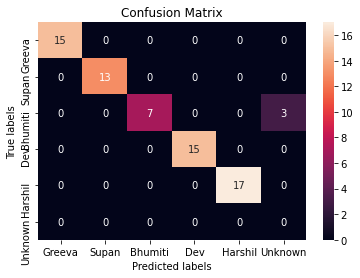

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax);
# sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

## SVM

### Splitting our database for SVM training

In [ ]:
image_paths = []
image_classes = []
class_id = 0

main_dir = '/gdrive/MyDrive/BitCoders/Assignment2SVM'
train_path = os.path.join(main_dir, 'Train')
people = os.listdir(train_path)

def imageList(path):
  return [os.path.join(path, file) for file in os.listdir(path)]

for training_name in people:
  dir = os.path.join(train_path, training_name)
  class_path = imageList(dir)
  image_paths += class_path
  image_classes += [class_id]*len(class_path)
  class_id += 1

des_list = []

for image_path in image_paths:
  kpt, desc = sift(image_path)
  des_list.append((image_path, desc))

descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
  descriptors = np.vstack((descriptors, descriptor))

descriptors_float = descriptors.astype(float)

from scipy.cluster.vq import kmeans, vq

k=200
voc, variance = kmeans(descriptors_float, k, 1)

image_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
  words, distance = vq(des_list[i][1], voc)
  for word in words:
    image_features[i][word] += 1

#TF-IDF
occurences = np.sum((image_features>0)*1, axis=0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*occurences+1)), "float32")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(image_features)
image_features = scaler.transform(image_features)

from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(image_features, np.array(image_classes))

from sklearn.externals import joblib
joblib.dump((clf, people, scaler, k, voc), '/gdrive/MyDrive/BitCoders/trainedSVM.pkl', compress=3)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/gdrive/MyDrive/BitCoders/trainedSVM.pkl']

### Fitting SVM Classifier and plotting Confusion Matrix

accuracy =  0.9855072463768116


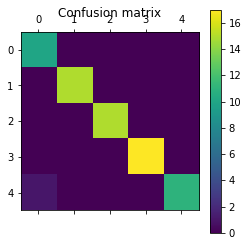

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
model = SVC()
ovo = OneVsOneClassifier(model)
ovo.fit(image_features, np.array(image_classes))

y_train =  [people[i] for i in image_classes]
yhat = [people[i] for i in ovo.predict(image_features)]

accuracy = accuracy_score(y_train, yhat)
print ("accuracy = ", accuracy)
cm1 = confusion_matrix(y_train, yhat)
plt.matshow(cm1)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [ ]:
y_train =  [people[i] for i in image_classes]
y_train_pred =  [people[i] for i in clf.predict(image_features)]

accuracy =  0.9714285714285714


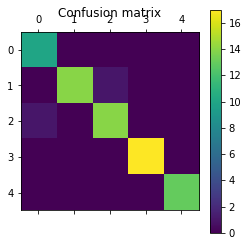

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

clf1, class_names1, stdScalar1, k1, voc1 = joblib.load('/gdrive/MyDrive/BitCoders/trainedSVM.pkl')
test_path = os.path.join(main_dir, 'Test')
test_classes = os.listdir(test_path)

test_image_paths = []
test_image_classes = []
test_class_id = 0

for test_class in test_classes:
    dir = os.path.join(test_path, test_class)
    class_path = imageList(dir)
    test_image_paths+=class_path
    test_image_classes+=[test_class_id]*len(class_path)
    test_class_id+=1

test_des_list = []
for image_path in test_image_paths:
  kpt, desc = sift(image_path)
  test_des_list.append((image_path, desc))

test_descriptors = test_des_list[0][1]
for image_path, descriptor in test_des_list[0:]:
  test_descriptors = np.vstack((test_descriptors, descriptor)) 

test_features = np.zeros((len(test_image_paths), k1), "float32")
for i in range(len(test_image_paths)):
    words, distance = vq(test_des_list[i][1],voc1)
    for w in words:
        test_features[i][w] += 1

nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(test_image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

test_features = stdScalar1.transform(test_features)
y_test =  [class_names1[i] for i in test_image_classes]
y_test_pred =  [class_names1[i] for i in clf1.predict(test_features)]

accuracy = accuracy_score(y_test, y_test_pred)
print ("accuracy = ", accuracy)
cm = confusion_matrix(y_test, y_test_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=people)
n_classes = y.shape[1]

In [ ]:
y_test_bin = label_binarize(y_test, classes=people)

In [ ]:
from sklearn import svm
random_state = np.random.RandomState(0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(image_features, y_train).decision_function(test_features)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### ROC Curve

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  del sys.path[0]


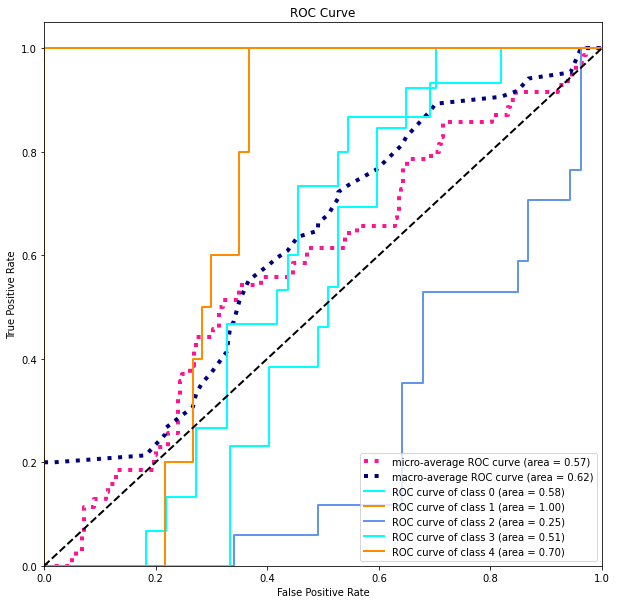

In [ ]:
from scipy import interp
from itertools import cycle

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## SURF

In [ ]:
image_sources = list(image_database.keys())
labels = list(image_database.values())
data = pd.DataFrame()
data['Image_Sources'] = image_sources
data['Labels'] = labels
data.head()

,Image_Sources,Labels
0,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/1...,Greeva
1,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/2...,Greeva
2,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/3...,Greeva
3,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/4...,Greeva
4,/gdrive/MyDrive/BitCoders/Assignment2/Greeva/5...,Greeva


In [ ]:
from sklearn.model_selection import train_test_split
X = data['Image_Sources']
y = data['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0, stratify=y)

In [ ]:
y_cap = []
for test_image_path in X_test:
  test_image = cv.imread(test_image_path,cv.IMREAD_GRAYSCALE)
  best_match = ''
  highest_matches = 0
  for train_image, label in zip(X_train, y_train):
    try:
      match, num_matches =  surf_match(test_image, train_image)
      if match and num_matches > highest_matches:
        highest_matches = num_matches
        best_match = label
    except:
      pass
      # print('Error')
  if len(best_match)<1:
    y_cap.append('Unknown')
  else:
    y_cap.append(best_match)

In [ ]:
classes = list(set(y_test))
classes.append('Unknown')

### Overall Accuracy : 98.57%

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is:", np.round(accuracy_score(y_test, y_cap)*100,3),"%")

Accuracy is: 98.571 %


### Overall weighted F1 score: 99.5%

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_cap, average='weighted')
print("F1 Score is:",np.round(f1*100, 3), "%")

F1 Score is: 99.248 %


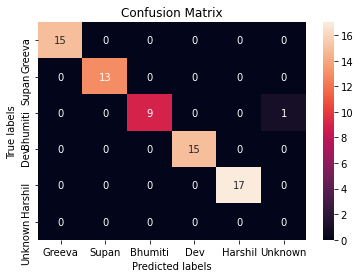

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_cap, labels=classes)
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax);
# sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_cap, labels=classes) 

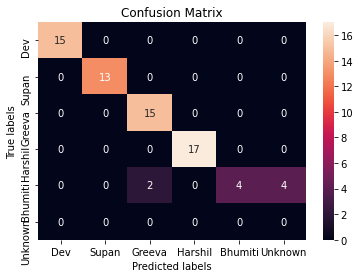

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax);
# sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(classes);
ax.yaxis.set_ticklabels(classes);
plt.show()

# Sample Outputs of our SIFT algorithm

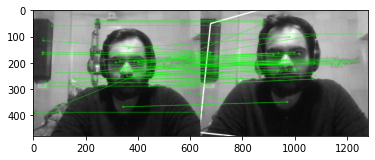

In [ ]:
test_image = cv.imread(X_test[131],cv.IMREAD_GRAYSCALE)
match, num_matches =  sift_match(test_image, X_train[120], plot=True)

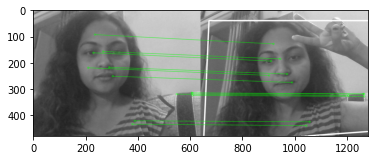

In [ ]:
test_image = cv.imread(X_test[20],cv.IMREAD_GRAYSCALE)
match, num_matches =  sift_match(test_image, X_train[33], plot=True)

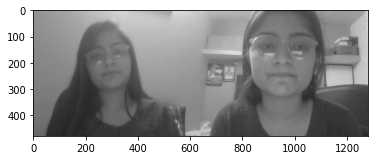

In [ ]:
test_image = cv.imread(X_test[0],cv.IMREAD_GRAYSCALE)
match, num_matches =  sift_match(test_image, X_train[18], plot=True)

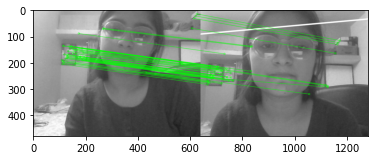

In [ ]:
test_image = cv.imread(X_test[16],cv.IMREAD_GRAYSCALE)
match, num_matches =  sift_match(test_image, X_train[18], plot=True)

# Testing other team's data (BuggerDebugger Group)

In [ ]:
other_team_dir = '/gdrive/MyDrive/BitCoders/Assignment2_other_team_data'

In [ ]:
image_database_1 = {}
pathlist_1 = Path(str(other_team_dir)).rglob('*.jpg')
for path in pathlist_1:
  path_in_str = str(path)
  image_database_1[path_in_str] = path_in_str.split('/')[-2]

image_sources_1 = list(image_database_1.keys())
labels_1 = list(image_database_1.values())
data_1 = pd.DataFrame()
data_1['Image_Sources'] = image_sources_1
data_1['Labels'] = labels_1
data_1.head()

,Image_Sources,Labels
0,/gdrive/MyDrive/BitCoders/Assignment2_other_te...,Rani_Mukherjee
1,/gdrive/MyDrive/BitCoders/Assignment2_other_te...,Rani_Mukherjee
2,/gdrive/MyDrive/BitCoders/Assignment2_other_te...,Rani_Mukherjee
3,/gdrive/MyDrive/BitCoders/Assignment2_other_te...,Rani_Mukherjee
4,/gdrive/MyDrive/BitCoders/Assignment2_other_te...,Rani_Mukherjee


In [ ]:
from sklearn.model_selection import train_test_split
X_1 = data_1['Image_Sources']
y_1 = data_1['Labels']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.5, random_state = 0, stratify=y_1)

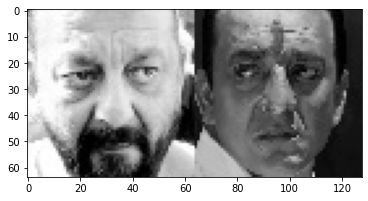

(False, 0)

In [ ]:
# a1 = cv.imread(X_train_1[0], cv.IMREAD_GRAYSCALE)
# cv2_imshow(a1)
a2 = cv.imread(X_test_1[45], cv.IMREAD_GRAYSCALE)
# cv2_imshow(a2)
sift_match(a2, X_train_1[50], plot=True)

In [ ]:
test_image = cv.imread(X_test_1[131],cv.IMREAD_GRAYSCALE)
match, num_matches =  sift_match(test_image, X_train[120], plot=True)

In [ ]:
y_cap_1 = []
for test_image_path in X_test_1:
  test_image = cv.imread(test_image_path,cv.IMREAD_GRAYSCALE)
  best_match = ''
  highest_matches = 0
  for train_image, label in zip(X_train_1, y_train_1):
    try:
      match, num_matches =  sift_match(test_image, train_image, MIN_MATCH_COUNT=1)
      if match and num_matches > highest_matches:
        highest_matches = num_matches
        best_match = label
    except:
      pass
      # print('Error')
  if len(best_match)<1:
    y_cap_1.append('Unknown')
  else:
    y_cap_1.append(best_match)

In [ ]:
classes_1 = list(set(y_test_1))
classes_1.append('Unknown')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is:", np.round(accuracy_score(y_test_1, y_cap_1)*100,3),"%")

Accuracy is: 32.5 %


In [ ]:
from sklearn.metrics import f1_score
f1_1 = f1_score(y_test_1, y_cap_1, average='weighted')
print("F1 Score is:",np.round(f1_1*100, 3), "%")

F1 Score is: 44.286 %


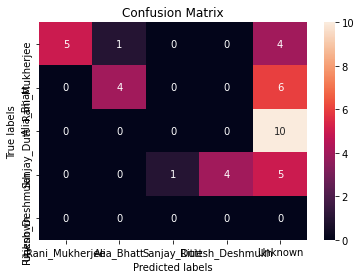

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix_1 = confusion_matrix(y_test_1, y_cap_1, labels=classes_1) 
ax1= plt.subplot()
sns.heatmap(cf_matrix_1, annot=True, ax = ax1);
# sns.heatmap(cf_matrix, annot=True)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix');
ax1.xaxis.set_ticklabels(classes_1);
ax1.yaxis.set_ticklabels(classes_1);
plt.show()

# Testing other team's data (YK Group)

In [ ]:
other_team_train = '/gdrive/MyDrive/BitCoders/CVAss22/Train'
other_team_test = '/gdrive/MyDrive/BitCoders/CVAss22/Test'

image_database_1 = {}
pathlist_1 = Path(str(other_team_train)).rglob('*.pgm')
for path in pathlist_1:
  path_in_str = str(path)
  image_database_1[path_in_str] = path_in_str.split('/')[-1].split('_')[0][-2:]

test_image_database_1 = {}
pathlist_2 = Path(str(other_team_test)).rglob('*.pgm')
for path in pathlist_2:
  path_in_str = str(path)
  test_image_database_1[path_in_str] = path_in_str.split('/')[-1].split('_')[0][-2:]

X_train_1 = list(image_database_1.keys())
y_train_1 = list(image_database_1.values())
X_test_1 = list(test_image_database_1.keys())
y_test_1 = list(test_image_database_1.values())

In [ ]:
y_cap_1 = []
for test_image_path in X_test_1:
  test_image = cv.imread(test_image_path,cv.IMREAD_GRAYSCALE)
  best_match = ''
  highest_matches = 0
  for train_image, label in zip(X_train_1, y_train_1):
    try:
      match, num_matches =  sift_match(test_image, train_image, MIN_MATCH_COUNT=1)
      if match and num_matches > highest_matches:
        highest_matches = num_matches
        best_match = label
    except:
      pass
      # print('Error')
  if len(best_match)<1:
    y_cap_1.append('Unknown')
  else:
    y_cap_1.append(best_match)

In [ ]:
classes_1 = list(set(y_test_1))
classes_1.append('Unknown')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is:", np.round(accuracy_score(y_test_1, y_cap_1)*100,3),"%")

Accuracy is: 98.75 %


In [ ]:
from sklearn.metrics import f1_score
f1_1 = f1_score(y_test_1, y_cap_1, average='weighted')
print("F1 Score is:",np.round(f1_1*100, 3), "%")

F1 Score is: 98.667 %


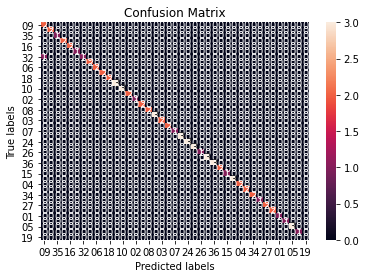

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix_1 = confusion_matrix(y_test_1, y_cap_1, labels=classes_1) 
ax1= plt.subplot()
sns.heatmap(cf_matrix_1, annot=True, ax = ax1);
# sns.heatmap(cf_matrix, annot=True)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix');
ax1.xaxis.set_ticklabels(classes_1);
ax1.yaxis.set_ticklabels(classes_1);
plt.show()

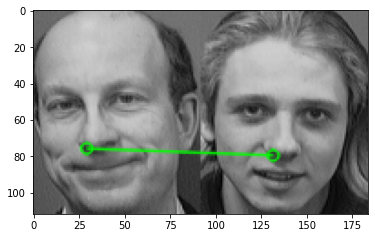

(False, 1)

In [ ]:
test_image = cv2.imread(image_database_2[26],cv.IMREAD_GRAYSCALE)
# cv2_imshow(test_image)
sift_match(test_image,image_database_2[9], plot=True, MIN_MATCH_COUNT=3)

# And we're DONE !